In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Installations

In [ ]:
!pip -q install geopandas
!pip -q install geojson
!pip -q install --upgrade folium
!pip -q install geemap
!pip -q install rasterio

     |████████████████████████████████| 972kB 15.8MB/s 
     |████████████████████████████████| 14.8MB 213kB/s 
     |████████████████████████████████| 6.5MB 42.3MB/s 
     |████████████████████████████████| 102kB 7.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0 which is incompatible.
     |████████████████████████████████| 389kB 16.3MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 983kB 50.2MB/s 
     |████████████████████████████████| 1.1MB 33.4MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 5.1MB 48.5MB/s 
     |████████████████████████████████| 225kB 56.6MB/s 
     |████████████████████████████████| 1.9MB 45.9MB/s 
     |████████████████████████████████| 153kB 43.8MB/s 
     |████████████████████████████████| 122kB 60.4MB/s 
     |████████████████████████████████| 112kB 56.9MB/s

In [ ]:
import json
import geojson
import requests

import rasterio 
from rasterio.plot import show
import rasterio.features
import rasterio.warp
import geopandas as gpd

import ee
import geemap
import geemap.eefolium as emap

import cv2
from google.colab.patches import cv2_imshow

import os

# Importing data

In [ ]:
omdena_dir = "/content/gdrive/My Drive/Official Folder of Kenya Red Cross Desert Locust Project/Data/" 
tif_files = [f for f in os.listdir(omdena_dir) if f.endswith('.tif')]
tfw_files = [f for f in os.listdir(omdena_dir) if f.endswith('.tfw')]
geo_json_file = omdena_dir + "High_risk_counties.geojson"

# Visualising the geojson file

In [ ]:
counties_df = gpd.read_file(geo_json_file)

In [ ]:
counties_df.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2,1,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3,2,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4,3,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ..."
3,4,4.610,9.838,5,4,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,6,1.713,8.311,7,6,Samburu,8.311013,1.713014,"POLYGON ((36.73652 2.51379, 36.73706 2.51398, ..."


In [ ]:
high_risk = counties_df['COUNTY']
high_risk = [i.upper() for i in high_risk ]
high_risk

['TURKANA',
 'MARSABIT',
 'MANDERA',
 'WAJIR',
 'SAMBURU',
 'ISIOLO',
 'BARINGO',
 'KEIYO-MARAKWET',
 'GARISSA',
 'LAIKIPIA',
 'MERU',
 'THARAKA',
 'TANA RIVER',
 'KITUI',
 'EMBU',
 'MACHAKOS',
 'NAIROBI',
 'TURKANA',
 'MARSABIT',
 'MANDERA',
 'WAJIR',
 'SAMBURU',
 'ISIOLO',
 'BARINGO',
 'KEIYO-MARAKWET',
 'GARISSA',
 'LAIKIPIA',
 'MERU',
 'THARAKA',
 'TANA RIVER',
 'KITUI',
 'EMBU',
 'MACHAKOS',
 'NAIROBI']

# Google Earth Authentication

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=HU63gcbu9LTGQXv0vv7TZRzowbAEH15-J3_D9TjRwbk&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g42r5oC6xjoNNLLqZGPs2htgz-2qj3NijPv8l20qxKbvZirU0TbviI

Successfully saved authorization token.


In [ ]:
r = requests.get("https://www.geoboundaries.org/gbRequest.html?ISO=KEN&ADM=ADM2")
dl_path = r.json()[0]['gjDownloadURL']

filename = 'geoboundary.geojson'
geoboundary = requests.get(dl_path).json()
with open(filename, 'w') as file:
   geojson.dump(geoboundary, file)

geoboundary = gpd.read_file(filename)

Total counties: 15


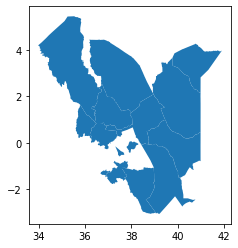

In [ ]:
counties = geoboundary[geoboundary.shapeName.isin(high_risk)].reset_index(drop=True)
print('Total counties: {}'.format(len(counties)))
counties.plot()

# View Tharaka satellite images + data

Total counties: 15


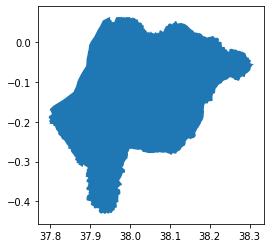

In [ ]:
tharaka_plot = geoboundary[geoboundary.shapeName.isin(['THARAKA'])]
print('Total counties: {}'.format(len(counties)))
tharaka_plot.plot()

In [ ]:
def view_all_img():
  for img in (tif_files):
    print(img)
    disp_im  = rasterio.open(omdena_dir+img)
    show(disp_im )

In [ ]:
def view_one_img_cv(img_path, size):
  img = cv2.imread(img_path)
  img = cv2.resize(img, size)
  cv2_imshow(img)

In [ ]:
def view_one_img(img):
  print(img)
  disp_im  = rasterio.open(omdena_dir+img)
  show(disp_im )

Tharaka_Nithi_Mission_2_transparent_mosaic_RGB.tif


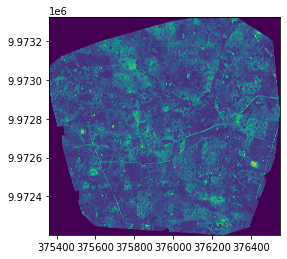

Tharaka_Nithi_Mission_2_transparent_mosaic_blue.tif


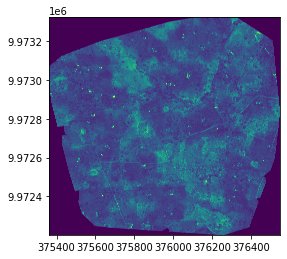

Tharaka_Nithi_Mission_2_transparent_mosaic_stack.tif


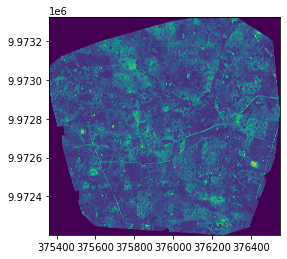

thakara_sample_1000.tif


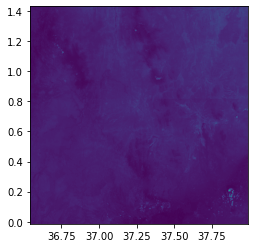

In [ ]:
view_all_img()

In [ ]:
with rasterio.open(omdena_dir+tif_files[1]) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[37.879981, -0.241317], [37.87998, -0.251444], [37.890649, -0.251445], [37.89065, -0.241318], [37.879981, -0.241317]]]}


Tharaka_Nithi_Mission_2_transparent_mosaic_RGB.tif


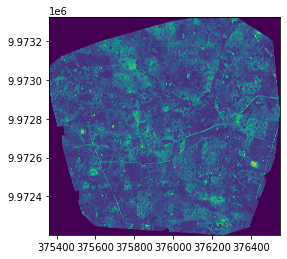

In [ ]:
view_one_img('Tharaka_Nithi_Mission_2_transparent_mosaic_RGB.tif')

# Breakdown tif to tiles

In [ ]:
import os, gdal

In [ ]:
main_tif = omdena_dir+ 'Tharaka_Nithi_Mission_2_transparent_mosaic_RGB.tif'

In [ ]:
if(not os.path.isdir('/content/f/')):
  os.makedirs('/content/f/')

if(not os.path.isdir('/content/f/tif_break/')):
  os.makedirs('/content/f/tif_break/')
out_path = '/content/f/tif_break/'

In [ ]:
tile_size_w = 64
tile_size_h = 64
tile_size_c = 3

In [ ]:
ds = gdal.Open(main_tif)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

In [ ]:
print(xsize, ysize)

10509 9908


In [ ]:
counter =0
img = cv2.imread(main_tif)
for i in range(0, xsize, tile_size_w):
    for j in range(0, ysize, tile_size_h):
        if ((i+tile_size_w)>xsize or (j+tile_size_h)>ysize):
          continue
        temp_im = img[j:(j+tile_size_h), i:(i+tile_size_w)]
        #print("a")
        gray_im = cv2.cvtColor(temp_im, cv2.COLOR_BGR2GRAY)
        if cv2.countNonZero(gray_im) == 0:
          continue
        newp = '/content/f/tif_break/im_'+str(i)+'_'+str(j)+'.jpg'
        cv2.imwrite(newp, temp_im)
        counter = counter + 1
        #cv2_imshow(temp_im)
        #print("b")
print(counter)

21236


In [ ]:
temp_im.shape, img.shape

((64, 64, 3), (9908, 10509, 3))

# Eurosat

## Eurosat imports

In [ ]:
import keras
import numpy as np
import pandas as pd
from keras.applications import resnet50, resnet_v2
from keras import models
from keras import layers
from keras import optimizers
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from keras.callbacks import ModelCheckpoint
import glob

In [ ]:
resnet_model = resnet_v2.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

NameError: ignored

In [ ]:
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

94773248/94765736 [==============================] - 1s 0us/step


## Data processing

In [ ]:
if(not os.path.isdir('/content/EuroSAT/')):
  os.makedirs('/content/EuroSAT/')
  
!unzip -uq '/content/gdrive/MyDrive/Official Folder of Kenya Red Cross Desert Locust Project/Data/EuroSAT.zip' -d '/content/EuroSAT/'

In [ ]:
count = 0
labels = os.listdir('/content/EuroSAT/2750')
labels

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Pasture',
 'River',
 'Industrial',
 'PermanentCrop',
 'Residential',
 'Highway',
 'SeaLake']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/ES/training'
TEST_DIR = '/content/ES/testing'
BATCH_SIZE = 64
NUM_CLASSES=len(labels)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

if not os.path.exists('/content/ES/'):
        os.mkdir('/content/ES/')

# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test
for l in labels:
    
    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [ ]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir('/content/EuroSAT/2750/'+l):
        data.update({os.path.join('/content/EuroSAT/2750/', l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

In [ ]:
import re, tqdm, shutil
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    print(test_paths.size)
    new_train_paths = [re.sub('/content/EuroSAT/2750', '/content/ES/training', i) for i in train_paths]
    new_test_paths = [re.sub('/content/EuroSAT/2750', '/content/ES/testing', i) for i in test_paths]
    
    for i in zip(train_paths, new_train_paths):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    for i in zip(test_paths, new_test_paths):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])


5400


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,             
        zoom_range=0.2,              
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/content/ES/training',
         target_size=(64,64),
         batch_size=32,
         class_mode='categorical')

Found 21600 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        '/content/ES/testing',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical', 
        shuffle=False)

Found 5400 images belonging to 10 classes.


## Model Prep

In [ ]:
model = models.Sequential()
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])

## Train model

In [ ]:
filepath="/content/gdrive/MyDrive/weights/Omdena/"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
callbacks_list

In [ ]:
history = model.fit(
          training_set, 
          steps_per_epoch=(training_set.samples/32),
          epochs=50,
          callbacks=callbacks_list,
          validation_data=test_set,
          validation_steps=(test_set.samples/32))

## Load model

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/weights/Omdena/')

## Testing

### Testing on Eurosat Data

In [ ]:
Y_pred = model.predict(test_set, test_set.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
classifcn_report = classification_report(test_set.classes, y_pred, target_names=labels)
print(classifcn_report)

                      precision    recall  f1-score   support

          AnnualCrop       0.99      0.99      0.99       600
              Forest       0.99      1.00      0.99       600
HerbaceousVegetation       1.00      0.97      0.98       600
             Pasture       1.00      0.99      0.99       500
               River       1.00      1.00      1.00       500
          Industrial       0.99      0.98      0.99       400
       PermanentCrop       0.97      0.99      0.98       500
         Residential       1.00      1.00      1.00       600
             Highway       0.99      1.00      0.99       500
             SeaLake       0.99      0.99      0.99       600

            accuracy                           0.99      5400
           macro avg       0.99      0.99      0.99      5400
        weighted avg       0.99      0.99      0.99      5400



### Testing on Tharaka tiles

In [ ]:
test_set1 = test_datagen.flow_from_directory(
        '/content/f',
        target_size=(64,64),
        batch_size=32,
        shuffle=False)

In [ ]:
tif_pred = model.predict_generator(test_set1, test_set1.samples//32 +1 )
tif_y_pred = np.argmax(tif_pred, axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


#### For Eurosat classes

In [ ]:
np.unique(tif_y_pred)

array([0, 1, 2, 3, 4, 5, 7, 8, 9])

In [ ]:
results = { i : 0 for i in labels }

In [ ]:
for el in tif_y_pred:
  results[labels[el]] = results[labels[el]] + 1
print(results)

{'Residential': 39, 'AnnualCrop': 1884, 'HerbaceousVegetation': 18603, 'Industrial': 4, 'Pasture': 130, 'SeaLake': 1, 'PermanentCrop': 0, 'Forest': 142, 'Highway': 114, 'River': 319}


In [ ]:
df = pd.DataFrame(results, index = [0])
df

,Residential,AnnualCrop,HerbaceousVegetation,Industrial,Pasture,SeaLake,PermanentCrop,Forest,Highway,River
0,39,1884,18603,4,130,1,0,142,114,319


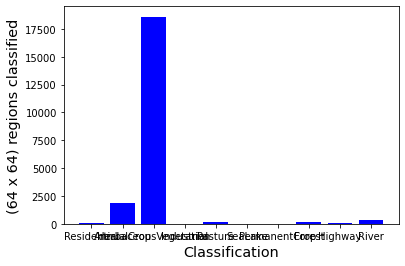

<Figure size 3600x576 with 0 Axes>

In [ ]:
plt.bar(list(results.keys()), results.values(), color='b')
plt.xlabel('Classification', size='x-large')
plt.ylabel('(64 x 64) regions classified', size= 'x-large')
plt.figure(figsize=(50,8))
plt.show()

#### For classes expeected by the Kenya Red Cross

In [ ]:
req_classification = {'Cropland': results['AnnualCrop']+results['PermanentCrop'], 
                      'Pastureland': results['Pasture'], 
                      'Forestland': results['Forest'], 
                      'Open water': results['River']+ results['SeaLake'], 
                      'Herbaceous vegetation': results['HerbaceousVegetation'], 
                      'Other land': results['Highway'] + results['Industrial']+ results['Residential']
                      }
for k in req_classification:
  print(k, ": ", req_classification[k])

Cropland :  1884
Pastureland :  130
Forestland :  142
Open water :  320
Herbaceous vegetation :  18603
Other land :  157


In [ ]:
df = pd.DataFrame(req_classification, index = [0]) 
df

,Cropland,Pastureland,Forestland,Open water,Herbaceous vegetation,Other land
0,1884,130,142,320,18603,157


### Testing on "before images" (https://drive.google.com/drive/folders/1i87S0A8ZCCCr_crXsadzPxt15zejV8Cm)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set2 = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Kenya images/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical', 
        shuffle=False)

Found 348 images belonging to 1 classes.


In [ ]:
ftest_pred = model.predict_generator(test_set2, test_set2.samples//32 +1 )
ftest_y_pred = np.argmax(ftest_pred, axis=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
results = { i : 0 for i in labels }

In [ ]:
for el in ftest_y_pred:
  results[labels[el]] = results[labels[el]] + 1
print(results)

{'AnnualCrop': 0, 'Forest': 0, 'HerbaceousVegetation': 19, 'Pasture': 1, 'River': 245, 'Industrial': 0, 'PermanentCrop': 0, 'Residential': 80, 'Highway': 3, 'SeaLake': 0}


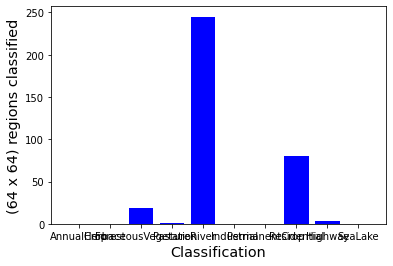

<Figure size 3600x576 with 0 Axes>

In [ ]:
plt.bar(list(results.keys()), results.values(), color='b')
plt.xlabel('Classification', size='x-large')
plt.ylabel('(64 x 64) regions classified', size= 'x-large')
plt.figure(figsize=(50,8))
plt.show()